Softmax tests passed

Training Softmax Regression Model
Iteration 0: Cost = 1.006823
Iteration 100: Cost = 0.319428
Iteration 200: Cost = 0.251376
Iteration 300: Cost = 0.211741
Iteration 400: Cost = 0.185004
Iteration 500: Cost = 0.165744
Iteration 600: Cost = 0.151226
Iteration 700: Cost = 0.139898
Iteration 800: Cost = 0.130812
Iteration 900: Cost = 0.123360
Iteration 999: Cost = 0.117192


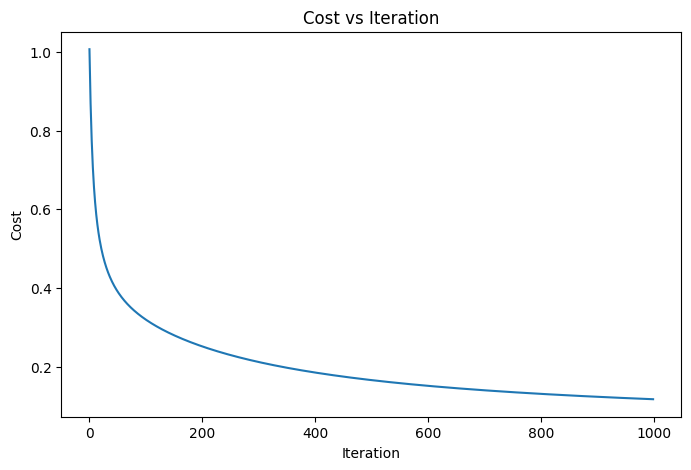

Train Cost: 0.1172
Test Cost: 0.1575
Test Accuracy: 93.33%

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Precision: 0.93
Recall: 0.93
F1-Score: 0.93


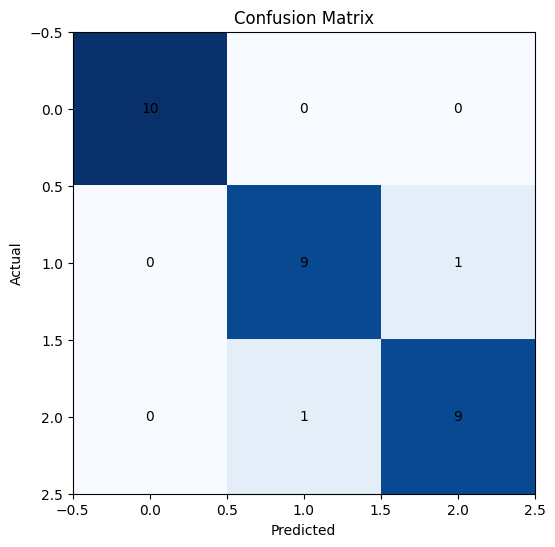

In [1]:
# ==================================================
# Softmax Regression From Scratch – COMPLETE SOLUTION
# Covers ALL tasks from Worksheet – Part II
# ==================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# --------------------------------------------------
# 1. Softmax Function
# --------------------------------------------------

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Test softmax

def test_softmax():
    z = np.array([[1, 2, 3]])
    out = softmax(z)
    assert np.allclose(out.sum(axis=1), 1)
    assert np.all(out >= 0)
    print("Softmax tests passed")

test_softmax()

# --------------------------------------------------
# 2. Categorical Log Loss (Single Sample)
# --------------------------------------------------

def loss_softmax(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred + 1e-10))

# --------------------------------------------------
# 3. Cost Function (Average Cross-Entropy)
# --------------------------------------------------

def cost_softmax(X, y, W, b):
    n = X.shape[0]
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    return -np.sum(y * np.log(y_pred + 1e-10)) / n

# --------------------------------------------------
# 4. Gradient Computation
# --------------------------------------------------

def compute_gradient_softmax(X, y, W, b):
    n = X.shape[0]
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    grad_W = np.dot(X.T, (y_pred - y)) / n
    grad_b = np.sum(y_pred - y, axis=0) / n
    return grad_W, grad_b

# --------------------------------------------------
# 5. Gradient Descent
# --------------------------------------------------

def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
    cost_history = []
    for i in range(n_iter):
        grad_W, grad_b = compute_gradient_softmax(X, y, W, b)
        W -= alpha * grad_W
        b -= alpha * grad_b
        cost = cost_softmax(X, y, W, b)
        cost_history.append(cost)
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")
    return W, b, cost_history

# --------------------------------------------------
# 6. Prediction Function
# --------------------------------------------------

def predict_softmax(X, W, b):
    z = np.dot(X, W) + b
    probs = softmax(z)
    return np.argmax(probs, axis=1)

# --------------------------------------------------
# 7. Evaluation Function
# --------------------------------------------------

def evaluate_classification(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    return cm, precision, recall, f1

# --------------------------------------------------
# 8. Dataset: IRIS
# --------------------------------------------------

iris = load_iris()
X = iris.data
y = iris.target

# One-hot encoding
y_onehot = np.zeros((y.size, y.max() + 1))
y_onehot[np.arange(y.size), y] = 1

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_onehot, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --------------------------------------------------
# 9. Training Softmax Regression
# --------------------------------------------------

num_features = X_train.shape[1]
num_classes = y_train.shape[1]

W = np.zeros((num_features, num_classes))
b = np.zeros(num_classes)

alpha = 0.1
n_iter = 1000

print("\nTraining Softmax Regression Model")
W, b, cost_history = gradient_descent_softmax(
    X_train, y_train, W, b, alpha, n_iter, show_cost=True
)

# Plot cost
plt.figure(figsize=(8,5))
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost vs Iteration")
plt.show()

# --------------------------------------------------
# 10. Evaluation
# --------------------------------------------------

y_train_pred = predict_softmax(X_train, W, b)
y_test_pred = predict_softmax(X_test, W, b)

y_train_true = np.argmax(y_train, axis=1)
y_test_true = np.argmax(y_test, axis=1)

train_cost = cost_softmax(X_train, y_train, W, b)
test_cost = cost_softmax(X_test, y_test, W, b)

print(f"Train Cost: {train_cost:.4f}")
print(f"Test Cost: {test_cost:.4f}")

accuracy = np.mean(y_test_pred == y_test_true) * 100
print(f"Test Accuracy: {accuracy:.2f}%")

cm, precision, recall, f1 = evaluate_classification(y_test_true, y_test_pred)

print("\nConfusion Matrix:\n", cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Confusion matrix visualization
plt.figure(figsize=(6,6))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center')
plt.show()

In [ ]:
# ==================================================
# Softmax Regression From Scratch – COMPLETE SOLUTION
# Covers ALL tasks from Worksheet – Part II
# ==================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [2]:
# --------------------------------------------------
# 1. Softmax Function
# --------------------------------------------------

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


In [3]:
# Test softmax

def test_softmax():
    z = np.array([[1, 2, 3]])
    out = softmax(z)
    assert np.allclose(out.sum(axis=1), 1)
    assert np.all(out >= 0)
    print("Softmax tests passed")

test_softmax()

Softmax tests passed


In [4]:
# --------------------------------------------------
# 2. Categorical Log Loss (Single Sample)
# --------------------------------------------------

def loss_softmax(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred + 1e-10))

In [5]:
# --------------------------------------------------
# 3. Cost Function (Average Cross-Entropy)
# --------------------------------------------------

def cost_softmax(X, y, W, b):
    n = X.shape[0]
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    return -np.sum(y * np.log(y_pred + 1e-10)) / n

In [6]:
# --------------------------------------------------
# 4. Gradient Computation
# --------------------------------------------------

def compute_gradient_softmax(X, y, W, b):
    n = X.shape[0]
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    grad_W = np.dot(X.T, (y_pred - y)) / n
    grad_b = np.sum(y_pred - y, axis=0) / n
    return grad_W, grad_b

In [7]:
# --------------------------------------------------
# 5. Gradient Descent
# --------------------------------------------------

def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
    cost_history = []
    for i in range(n_iter):
        grad_W, grad_b = compute_gradient_softmax(X, y, W, b)
        W -= alpha * grad_W
        b -= alpha * grad_b
        cost = cost_softmax(X, y, W, b)
        cost_history.append(cost)
        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")
    return W, b, cost_history

In [8]:
# --------------------------------------------------
# 6. Prediction Function
# --------------------------------------------------

def predict_softmax(X, W, b):
    z = np.dot(X, W) + b
    probs = softmax(z)
    return np.argmax(probs, axis=1)

In [9]:
# --------------------------------------------------
# 7. Evaluation Function
# --------------------------------------------------

def evaluate_classification(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    return cm, precision, recall, f1

In [10]:
# --------------------------------------------------
# 8. Dataset: IRIS
# --------------------------------------------------

iris = load_iris()
X = iris.data
y = iris.target

# One-hot encoding
y_onehot = np.zeros((y.size, y.max() + 1))
y_onehot[np.arange(y.size), y] = 1

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_onehot, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
# --------------------------------------------------
# 9. Training Softmax Regression
# --------------------------------------------------

num_features = X_train.shape[1]
num_classes = y_train.shape[1]

W = np.zeros((num_features, num_classes))
b = np.zeros(num_classes)

alpha = 0.1
n_iter = 1000

print("\nTraining Softmax Regression Model")
W, b, cost_history = gradient_descent_softmax(
    X_train, y_train, W, b, alpha, n_iter, show_cost=True
)


Training Softmax Regression Model
Iteration 0: Cost = 1.006823
Iteration 100: Cost = 0.319428
Iteration 200: Cost = 0.251376
Iteration 300: Cost = 0.211741
Iteration 400: Cost = 0.185004
Iteration 500: Cost = 0.165744
Iteration 600: Cost = 0.151226
Iteration 700: Cost = 0.139898
Iteration 800: Cost = 0.130812
Iteration 900: Cost = 0.123360
Iteration 999: Cost = 0.117192


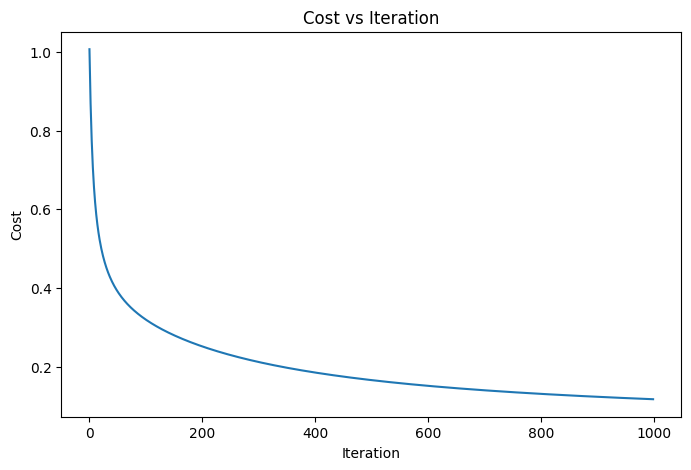

In [12]:
# Plot cost
plt.figure(figsize=(8,5))
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost vs Iteration")
plt.show()


In [13]:
# --------------------------------------------------
# 10. Evaluation
# --------------------------------------------------

y_train_pred = predict_softmax(X_train, W, b)
y_test_pred = predict_softmax(X_test, W, b)

y_train_true = np.argmax(y_train, axis=1)
y_test_true = np.argmax(y_test, axis=1)

train_cost = cost_softmax(X_train, y_train, W, b)
test_cost = cost_softmax(X_test, y_test, W, b)

print(f"Train Cost: {train_cost:.4f}")
print(f"Test Cost: {test_cost:.4f}")

accuracy = np.mean(y_test_pred == y_test_true) * 100
print(f"Test Accuracy: {accuracy:.2f}%")

cm, precision, recall, f1 = evaluate_classification(y_test_true, y_test_pred)

print("\nConfusion Matrix:\n", cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Train Cost: 0.1172
Test Cost: 0.1575
Test Accuracy: 93.33%

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Precision: 0.93
Recall: 0.93
F1-Score: 0.93


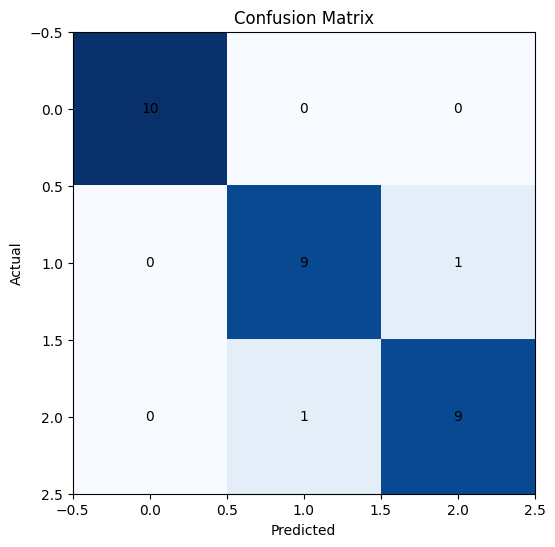

In [14]:
# Confusion matrix visualization
plt.figure(figsize=(6,6))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center')
plt.show()